In [6]:
import pandas as pd
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting

pd.set_option('display.float_format', '{:.2f}'.format)

In [7]:
def read_data():
    return pd.read_csv("BenchmarkHoldings.csv"),\
           pd.read_csv("PortfolioHoldings.csv"),\
           pd.read_csv("CarbonData.csv"),\
           pd.read_csv("IDmap.csv")

def merge_data(data,id_map,carbon_data):
    #merge portfolio/benchmark with id_map
    if "Ticker" not in data.columns:
        data = pd.merge(
        data,
        id_map[["sedol","ticker","CategoryGroup"]],
        on="ticker",how="left")
    else:
        data = pd.merge(
        data,
        id_map[["sedol","ticker","CategoryGroup"]],
        left_on="Ticker",right_on = "ticker", how="left")
    
    #merge with carbon data
    data = pd.merge(
    data,
    carbon_data[["SEDOL",
                 "EMISSIONS_SCOPE_1",
                 "EMISSIONS_SCOPE_2",
                 "REVENUE_USD",]],
    right_on="SEDOL",left_on="sedol",
    how="left")
    return data
#drop NaN values
def preprocess_data(data):
    return data.dropna()

def calculate_weight(data):
    data['IndexWeight'] = (data['Units']*data['Price'])/(sum(data['Units']*data['Price']))
    return data

def calculate_waci(boolean,data):
    if boolean:
        return sum(data['IndexWeight']*((data['EMISSIONS_SCOPE_1']+data['EMISSIONS_SCOPE_2'])/data['REVENUE_USD']))
    else:
        waci_category = []
        for i in sorted(data['CategoryGroup'].unique()):
            waci_data = data[data['CategoryGroup']==i]
            waci = sum(
            waci_data['IndexWeight']*
            ((waci_data['EMISSIONS_SCOPE_1'] + waci_data['EMISSIONS_SCOPE_2'])/waci_data['REVENUE_USD']))
            waci_category.append(waci)
        return waci_category

def contribution_to_total(waci_total,waci_category):
    #Portfolio
    display(f"Total = {waci_total}")
    for index,i in enumerate(waci_category):
        contribution = (i/waci_total * 100)
        display(f"category {index+1}:{i}, contribution to Total {round(contribution)}%")

def display_barplot(waci_category):
    # Create the bar plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    bars = sns.barplot(x=[1,2,3], y=waci_category,palette="viridis")

    # Add labels and title using Matplotlib
    plt.xlabel('Categories', fontsize=14)
    plt.ylabel('Weighted Average', fontsize=14)
    plt.title('Weighted Average per catergories', fontsize=16)
    # Annotate the bars with the actual values
    for i, value in enumerate(waci_category):
        plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)
    # Show the plot
    plt.show()

'BenchMark'

'Total = 0.00016113915360866095'

'category 1:3.2238385123101994e-05, contribution to Total 20%'

'category 2:4.4007589302295724e-05, contribution to Total 27%'

'category 3:8.489317918326324e-05, contribution to Total 53%'

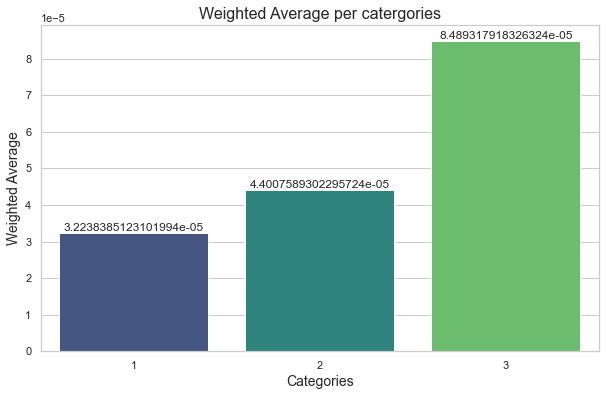

'Portfolio'

'Total = 0.00013295976460563042'

'category 1:3.438160838486404e-05, contribution to Total 26%'

'category 2:5.106477330728993e-05, contribution to Total 38%'

'category 3:4.751338291347644e-05, contribution to Total 36%'

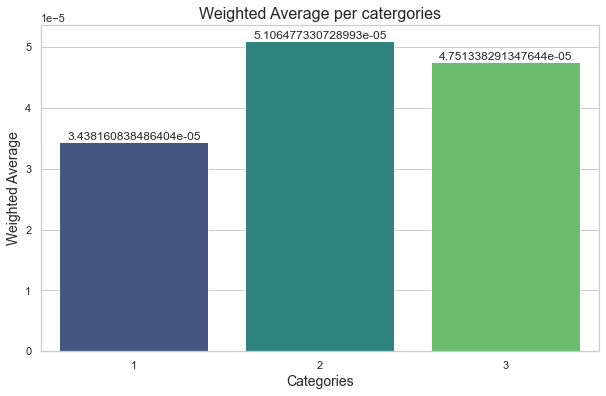

In [8]:
#read
benchmark_holding_data,portfolio_holding,carbon_data,id_map = read_data()
portfolio_holding = calculate_weight(portfolio_holding) # calculate weight

#merge
merged_benchmark_id_map = merge_data(benchmark_holding_data,id_map,carbon_data)
merged_portfolio_id_map = merge_data(portfolio_holding,id_map,carbon_data)

#pre process values dropped (benchmark: JHX) & (portfolio:JHX,ASX,QBE)
merged_benchmark_id_map = preprocess_data(merged_benchmark_id_map)
merged_portfolio_id_map = preprocess_data(merged_portfolio_id_map)

#calculate WACI
benchmark_waci_total = calculate_waci(True,merged_benchmark_id_map)
portfolio_waci_total = calculate_waci(True,merged_portfolio_id_map)
#calculate WACI for each Catergory
benchmark_waci_category = calculate_waci(False,merged_benchmark_id_map)
portfolio_waci__category = calculate_waci(False,merged_portfolio_id_map)

#Contribution & Graph
display("BenchMark")
contribution_to_total(benchmark_waci_total,benchmark_waci_category)
display_barplot(benchmark_waci_category)

display("Portfolio")
contribution_to_total(portfolio_waci_total,portfolio_waci__category)
display_barplot(portfolio_waci__category)